# Creating a Logistic Regression Model Using Keras

In this activity, we are going to create a basic model using the Keras library. We will perform the same classification task that we did in *Chapter 1, Introduction to Machine Learning with Keras*. We will use the same online shopping purchasing intention dataset and attempt to predict the same variable.

In the previous chapter, we used a logistic regression model to predict whether a user would purchase a product from a website when given various attributes about the online session's behavior and the attributes of the web page. In this activity, we will introduce the Keras library, though we'll continue to utilize the libraries we introduced previously, such as pandas, for easily loading in the data, and sklearn, for any data preprocessing and model evaluation metrics.

### 1. Load in the feature and target datasets from the previous chapter.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow import random

Using TensorFlow backend.


In [3]:
df_x = pd.read_csv('../data/OSI_feats.csv')
df_y = pd.read_csv('../data/OSI_target.csv')
print(df_x.shape)
print(df_y.shape)

(12330, 68)
(12330, 1)


### 2. Split the training and target data into training and test datasets. The model will be fit to the training dataset and the test dataset will be used to evaluate the model.

In [4]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

### 3. Instantiate a model of the Sequential class from the keras.models library.

In [5]:
np.random.seed(42)        
random.set_seed(42)
model = Sequential()

### 4. Add a single layer of the Dense class from the keras.layers package to the model instance. The number of nodes should be equal to the number of features in the feature dataset.

In [6]:
x_train.shape[1]

68

In [7]:
input_shape = x_train.shape[1]
model.add(Dense(units=1, input_dim=68))

### 5. Add a sigmoid activation function to the model.

In [8]:
model.add(Activation('sigmoid'))

### 6. Compile the model instance by specifying the optimizer to use, the loss metric to evaluate, and any other metrics to evaluate after each epoch.

In [9]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']  
)

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 69        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 69
Trainable params: 69
Non-trainable params: 0
_________________________________________________________________


### 7. Fit the model to the training data, specifying the number of epochs to run for and the validation split to use.

In [11]:
history = model.fit(
    x=x_train,
    y=y_train['Revenue'],
    epochs=200,
    batch_size=500,
    verbose=1,
    validation_split=0.2,
    shuffle=False,
)

==============================] - 0s 8us/step - loss: 0.3129 - accuracy: 0.8821 - val_loss: 0.3004 - val_accuracy: 0.8789
Epoch 66/200
7891/7891 [==============================] - 0s 8us/step - loss: 0.3124 - accuracy: 0.8825 - val_loss: 0.3000 - val_accuracy: 0.8789
Epoch 67/200
7891/7891 [==============================] - 0s 10us/step - loss: 0.3119 - accuracy: 0.8824 - val_loss: 0.2996 - val_accuracy: 0.8784
Epoch 68/200
7891/7891 [==============================] - 0s 8us/step - loss: 0.3114 - accuracy: 0.8824 - val_loss: 0.2992 - val_accuracy: 0.8789
Epoch 69/200
7891/7891 [==============================] - 0s 11us/step - loss: 0.3110 - accuracy: 0.8824 - val_loss: 0.2988 - val_accuracy: 0.8789
Epoch 70/200
7891/7891 [==============================] - 0s 8us/step - loss: 0.3106 - accuracy: 0.8823 - val_loss: 0.2984 - val_accuracy: 0.8799
Epoch 71/200
7891/7891 [==============================] - 0s 7us/step - loss: 0.3102 - accuracy: 0.8825 - val_loss: 0.2981 - val_accuracy: 0.8794


### 8. Plot the loss and other evaluation metrics with respect to the epoch that will be evaluated on the training and validation datasets.

In [12]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [13]:
history.history['accuracy']

[0.7066278,
 0.42643517,
 0.52807,
 0.5010772,
 0.52578884,
 0.56748194,
 0.60828793,
 0.64820683,
 0.6816627,
 0.7119503,
 0.7379293,
 0.7656824,
 0.7832974,
 0.79495627,
 0.786719,
 0.77734125,
 0.7726524,
 0.7848182,
 0.8007857,
 0.8144722,
 0.82435685,
 0.83322775,
 0.8403244,
 0.84602714,
 0.8499556,
 0.8527436,
 0.8554049,
 0.8595869,
 0.8630085,
 0.8645292,
 0.86706376,
 0.8692181,
 0.87035865,
 0.8717526,
 0.87225956,
 0.8735268,
 0.8745406,
 0.8750475,
 0.87568116,
 0.8758079,
 0.87618804,
 0.8758079,
 0.87745535,
 0.8785959,
 0.87808895,
 0.87846917,
 0.8792295,
 0.87998986,
 0.8806235,
 0.88075024,
 0.88075024,
 0.8810037,
 0.88087696,
 0.8810037,
 0.8811304,
 0.88138384,
 0.8818908,
 0.8820175,
 0.88176405,
 0.88176405,
 0.88163733,
 0.88151056,
 0.88176405,
 0.8820175,
 0.8821442,
 0.8825244,
 0.88239765,
 0.88239765,
 0.88239765,
 0.88227093,
 0.8825244,
 0.8825244,
 0.88265115,
 0.8829046,
 0.88277787,
 0.8830313,
 0.88328475,
 0.88341147,
 0.8835382,
 0.88341147,
 0.883

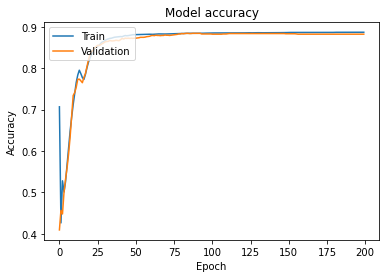

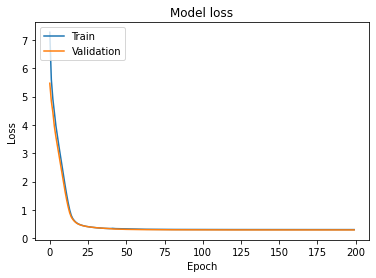

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [15]:
model.evaluate(x_test, y_test['Revenue'])

2466/2466 [==============================] - 0s 52us/step


[0.312846966395993, 0.871046245098114]

In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test['Revenue'])
print(f'The loss on the test set is {test_loss:.4f} and the accuracy is {test_acc*100:.3f}%')

2466/2466 [==============================] - 0s 49us/step
The loss on the test set is 0.3128 and the accuracy is 87.105%
